In [55]:
import pandas as pd

In [56]:
import matplotlib.pyplot as plt

In [57]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")

filmes.columns = ["filmeId", "titulo", "generos"]

In [58]:
avaliacoes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv")

avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]

In [59]:
filmes["generos"].str.get_dummies('|').sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

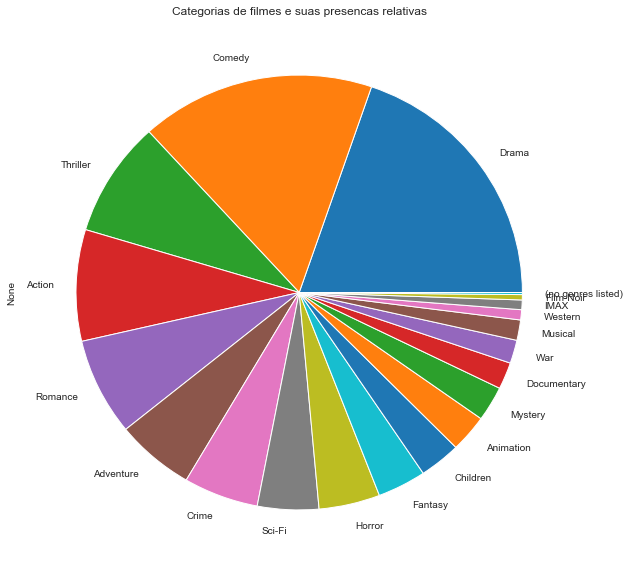

In [60]:
#Gráfico não recomendado
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='pie', 
    title='Categorias de filmes e suas presencas relativas',
    figsize=(10, 10))

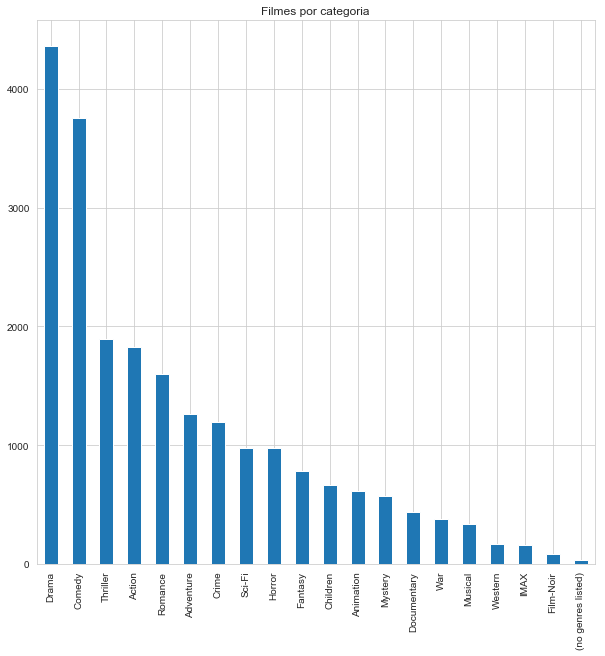

In [61]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='bar', 
    title='Filmes por categoria',
    figsize=(10, 10))

# Desafio 1: Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

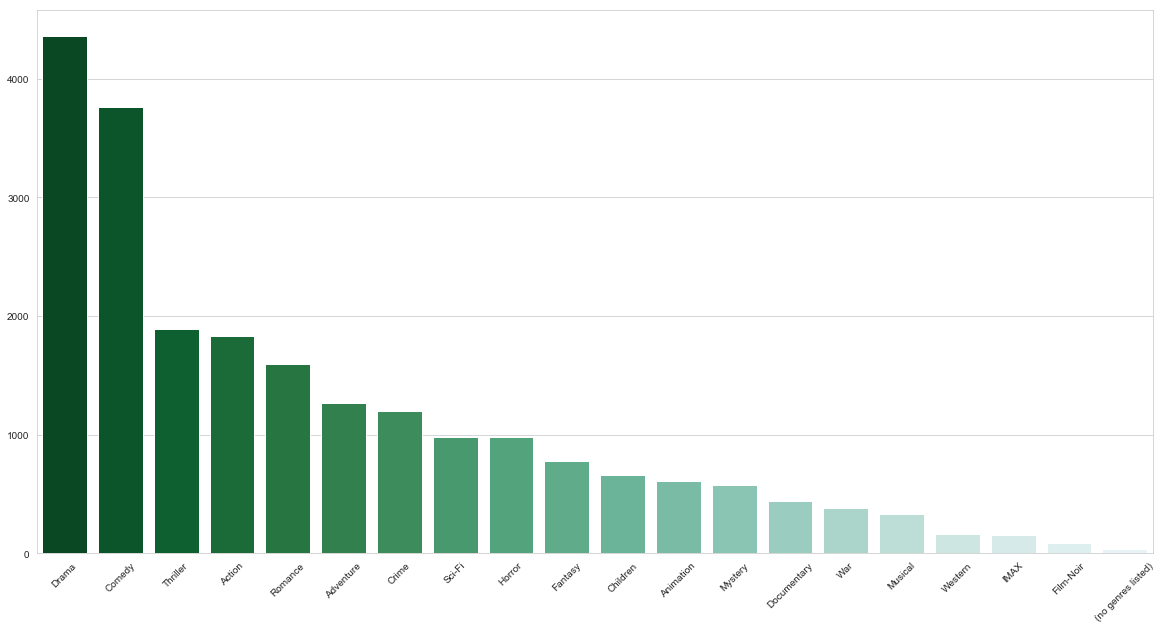

In [62]:
import seaborn as sns
sns.set_style("whitegrid")
filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)

plt.figure(figsize=(20,10))
sns.barplot(x=filmes_por_genero.index,
           y=filmes_por_genero.values,
           palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 2))
plt.xticks(rotation=45)

3.9209302325581397


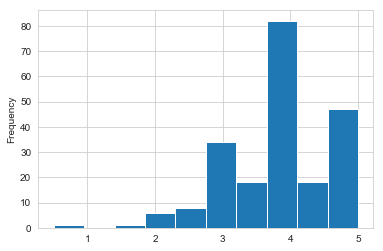

In [63]:
notas_do_filme_1 = avaliacoes.query("filmeId==1")["nota"]
print(notas_do_filme_1.mean())
notas_do_filme_1.plot(kind='hist')

3.4318181818181817


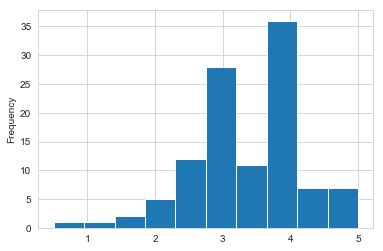

In [64]:
notas_do_filme_2 = avaliacoes.query("filmeId==2")["nota"]
print(notas_do_filme_2.mean())
notas_do_filme_2.plot(kind='hist')

In [65]:
notas_do_filme_2.describe()

count    110.000000
mean       3.431818
std        0.881713
min        0.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: nota, dtype: float64

In [66]:
notas_do_filme_1.describe()

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: nota, dtype: float64

In [67]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
filmes_media = filmes.join(notas_medias_por_filme, on="filmeId").rename(columns={'nota': 'nota_media'})

filmes_media.sort_values("nota_media", ascending=False)[2450:2500]

,filmeId,titulo,generos,nota_media
745,973,Meet John Doe (1941),Comedy|Drama,3.900000
6632,56251,Futurama: Bender's Big Score (2007),Animation|Comedy|Sci-Fi,3.900000
101,116,Anne Frank Remembered (1995),Documentary,3.900000
5719,27846,"Corporation, The (2003)",Documentary,3.900000
802,1050,Looking for Richard (1996),Documentary|Drama,3.900000
3983,5617,Secretary (2002),Comedy|Drama|Romance,3.900000
1323,1785,King of New York (1990),Crime|Thriller,3.900000
7103,70599,"Time Traveler's Wife, The (2009)",Drama|Romance|Sci-Fi,3.900000
5248,8607,Tokyo Godfathers (2003),Adventure|Animation|Drama,3.900000
4677,6985,"Passion of Joan of Arc, The (Passion de Jeanne...",Drama,3.900000


In [68]:
def plot_filme(n):
    notas_do_filme = avaliacoes.query("filmeId=={}".format(n))["nota"]
    notas_do_filme.plot(kind='hist')
    return notas_do_filme.describe()
    

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

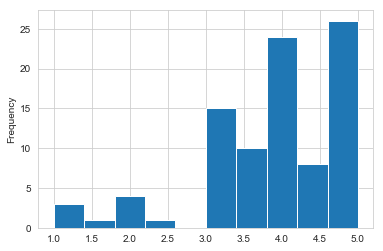

In [69]:
plot_filme(919)

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

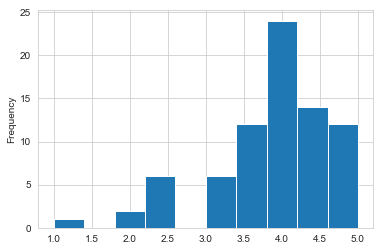

In [70]:
plot_filme(46578)

In [71]:
def plot_filme(n):
    notas_do_filme = avaliacoes.query("filmeId=={}".format(n))["nota"]
    notas_do_filme.plot(kind='hist')
    plt.show()
    notas_do_filme.plot.box()
    plt.show()
    return notas_do_filme.describe()

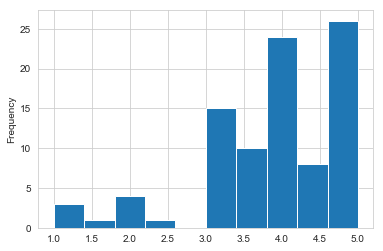

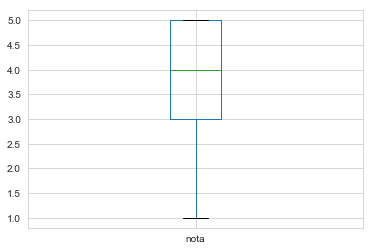

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [72]:
plot_filme(919)

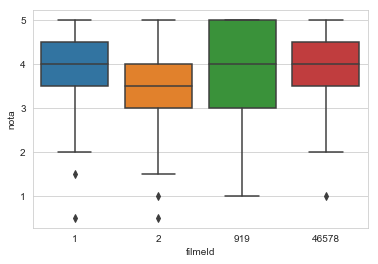

In [73]:
sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x ="filmeId", y="nota")

# Desafio 2: Encontar vários filmes com médias próximas e distribuições diferentes, use a função plot_filmes(n) para plotar.

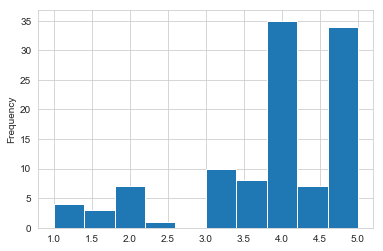

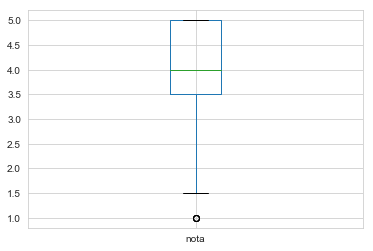

count    109.000000
mean       3.894495
std        1.103600
min        1.000000
25%        3.500000
50%        4.000000
75%        5.000000
max        5.000000
Name: nota, dtype: float64

In [74]:
plot_filme(924)

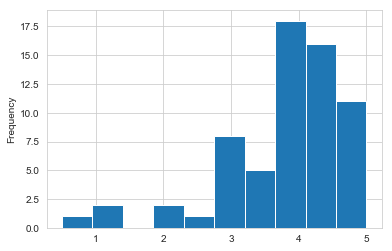

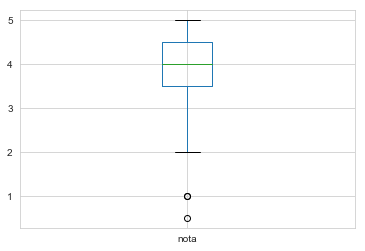

count    64.000000
mean      3.898438
std       1.008612
min       0.500000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

In [75]:
plot_filme(55820)

# Desafio 3: Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!).

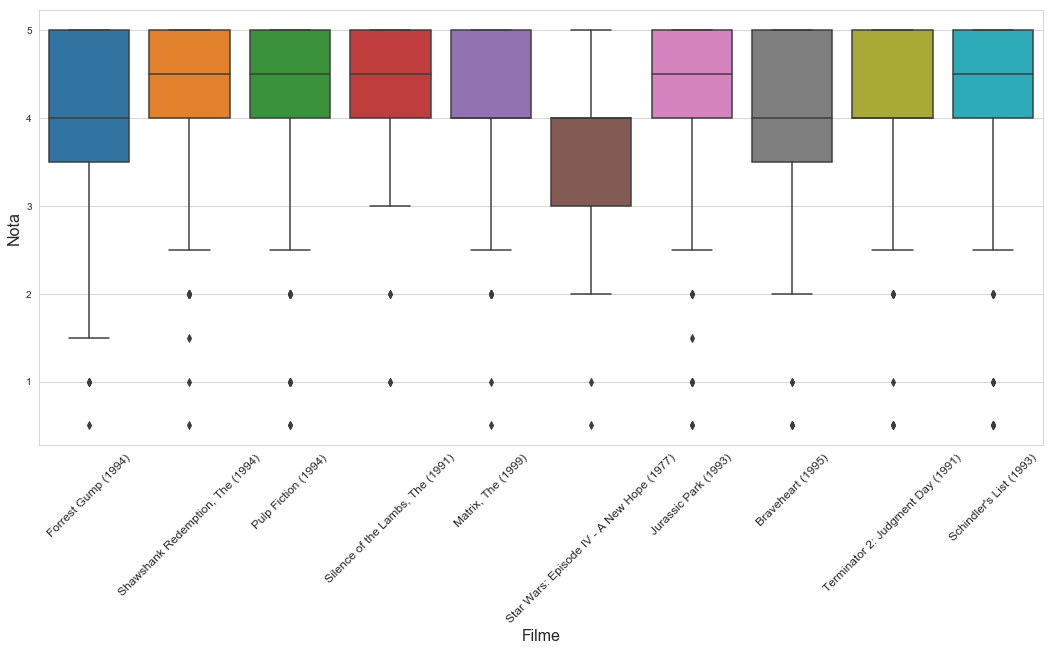

In [76]:
filmes_total_votos = avaliacoes.groupby("filmeId")["nota"].count()
filmes_media_total = filmes_media.join(filmes_total_votos, on="filmeId").rename(columns={'nota': 'total_votos'})

top_10_votos_por_filme = filmes_media_total.sort_values(by='total_votos', ascending=False).head(10)
top_10_votos_por_filme_titulos = top_10_votos_por_filme['titulo'].to_list()
top_10_votos_por_filme_ids = top_10_votos_por_filme['filmeId'].to_list()

plt.figure(figsize=(18, 8))
ax = sns.boxplot(x='filmeId', y='nota', data=avaliacoes.query("filmeId in {}".format(top_10_votos_por_filme_ids)))
ax.set_xticklabels(top_10_votos_por_filme_titulos, fontsize=12)
ax.set_xlabel("Filme", fontsize=16)
ax.set_ylabel("Nota", fontsize=16)
plt.xticks(rotation=45)

plt.show()

# Desafio 4: Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

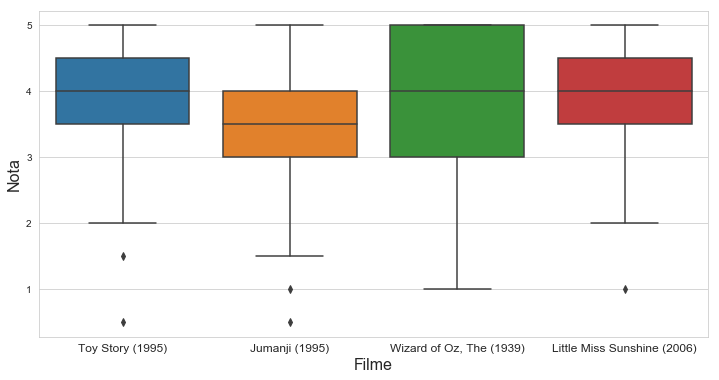

In [77]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x="filmeId", y="nota")

ax.set_xticklabels(filmes.query("filmeId in [1,2,919,46578]")['titulo'], fontsize=12)
ax.set_xlabel("Filme", fontsize=16)
ax.set_ylabel("Nota", fontsize=16)
plt.show()

# Desafio 5: Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [78]:
def explora_filme(filme_id):
    filme = filmes.query('filmeId == {}'.format(filme_id))
    notas = avaliacoes.query('filmeId == {}'.format(filme_id))['nota']
    
    print('Filme: {}'.format(filme.iloc[0, 1]))
    
    print('Moda: {}'.format(notas.mode().values))    
    print('Média: {}'.format(notas.mean()))
    print('Mediana: {}'.format(notas.median()))
    

In [79]:
explora_filme(8387)
explora_filme(89386)
explora_filme(3774)

Filme: Police Academy: Mission to Moscow (1994)
Moda: [0.5]
Média: 0.8
Mediana: 0.5
Filme: Pearl Jam Twenty (2011)
Moda: [0.5]
Média: 0.5
Mediana: 0.5
Filme: House Party 2 (1991)
Moda: [0.5 1. ]
Média: 0.75
Mediana: 0.75


# Desafio 6: Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).

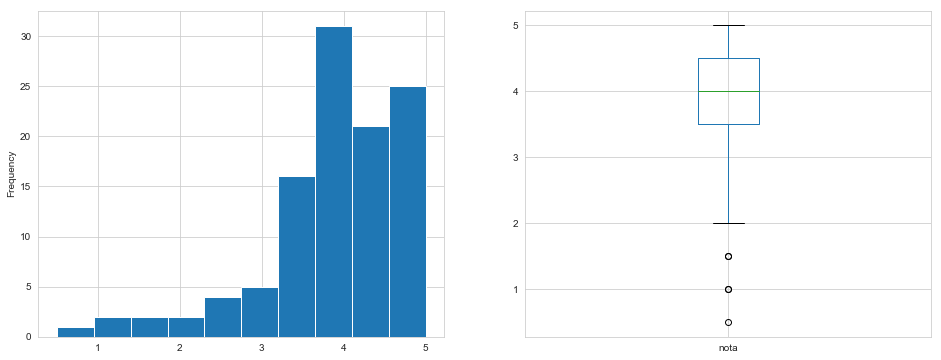

In [80]:
donnie_darko = avaliacoes.query('filmeId == 4878')['nota']

f, axes = plt.subplots(1, 2, figsize=(16, 6))

donnie_darko.plot(kind='hist', ax=axes[0])
donnie_darko.plot(kind='box', ax=axes[1])

plt.show()

In [81]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId").rename(columns={'nota': 'nota_media'})
filmes_com_media.head()

,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [82]:
filmes_com_media_e_ano = filmes_com_media.copy()
filmes_com_media_e_ano['ano'] = filmes_com_media['titulo'].str.extract("\((\d{4})\)")
filmes_com_media_e_ano.head()

,filmeId,titulo,generos,nota_media,ano
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,1995
4,5,Father of the Bride Part II (1995),Comedy,3.071429,1995


# Desafio 7: Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

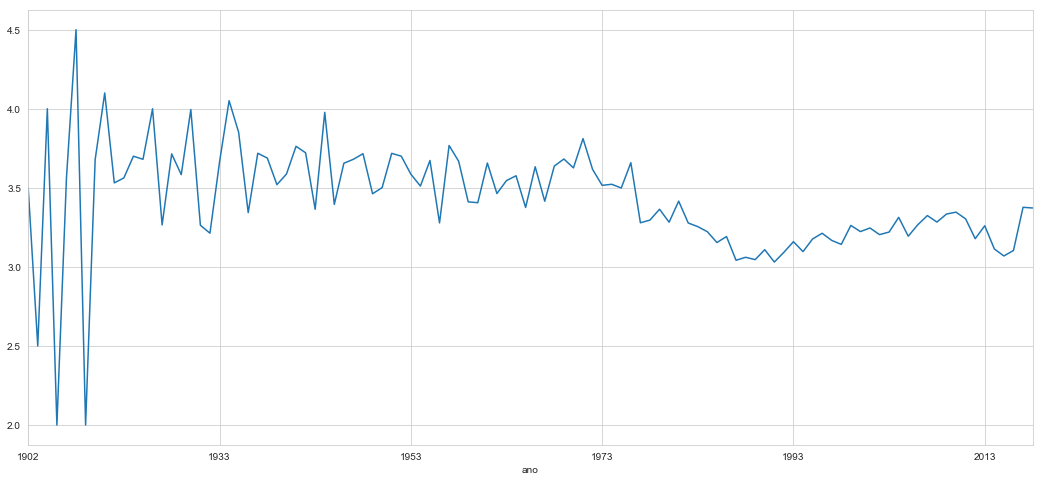

In [83]:
nota_media_por_ano = filmes_com_media_e_ano.groupby('ano')['nota_media'].mean()

plt.figure(figsize=(18, 8))
nota_media_por_ano.plot()